# Bidirectional Associative Memory(BAM) Architecture
The architecture of BAM network is shown in Figure 4-6. It consists of two layers of neurons which are connected by directed weighted path interconnections. The network dynamics involve two layers of interaction. The BAM network iterates by sending the signals back and forth between the two layers until all the neurons reach equilibrium. The weights associated with the network are bidirectional. Thus, BAM can respond to the inputs in either layer. Figure 4-6 shows a single layer BAM network consisting of n units in X layer and m units in Y layer. The layers can be connected in both directions (bidirectional) with the result the weight matrix sent from the X layer to the Y layer is W and the weight matrix for signals sent from the Y layer to the X layer is WT. Thus, the weight matrix is calculated in both directions.
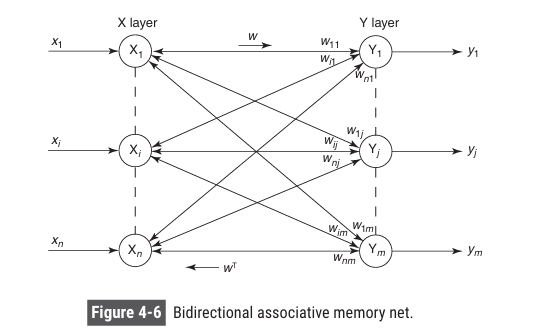

#BAM Network Example

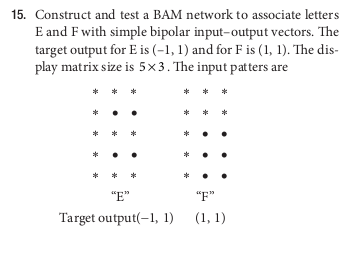


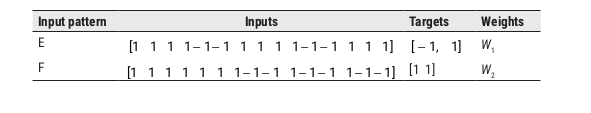

In [ ]:
import numpy as np

class BAM:
    def __init__(self, input_vectors, output_vectors):
        # input_vectors: list of input bipolar vectors (each of size n)
        # output_vectors: list of corresponding output bipolar vectors (each of size m)
        self.p = len(input_vectors)  # number of patterns
        self.n = input_vectors[0].size
        self.m = output_vectors[0].size

        # Initialize weight matrix of size n x m to zero
        self.W = np.zeros((self.n, self.m))

        # Store patterns
        self.X = input_vectors
        self.Y = output_vectors

        # Step 0: Initialize weights using Hebbian learning rule (outer product sum)
        for i in range(self.p):
            self.W += np.outer(self.X[i], self.Y[i])

    def activation(self, net_input):
        # Bipolar sign activation function
        # f(x) = +1 if x > 0, -1 if x < 0, else 0 (could use 1 or -1 for zero)
        return np.where(net_input > 0, 1, -1)

    def recall(self, input_pattern, side='X', max_iter=100):
      if side == 'X':
          x = input_pattern.copy()
          y = np.zeros(self.m)
      elif side == 'Y':
          y = input_pattern.copy()
          x = np.zeros(self.n)
      else:
          raise ValueError("side must be 'X' or 'Y'")

      print(f"Initial activation (side={side}):")
      print(f"X: {x}")
      print(f"Y: {y}")
      print("----")

      for i in range(max_iter):
          if side == 'X':
              y_new = self.activation(np.dot(x, self.W))
              x_new = self.activation(np.dot(y_new, self.W.T))
          else:  # side == 'Y'
              x_new = self.activation(np.dot(y, self.W.T))
              y_new = self.activation(np.dot(x_new, self.W))

          print(f"Iteration {i+1}:")
          print(f"X: {x_new}")
          print(f"Y: {y_new}")
          print("----")

          if np.array_equal(x, x_new) and np.array_equal(y, y_new):
              print(f"Converged at iteration {i+1}")
              break

          x, y = x_new, y_new

      return x, y



# Define input bipolar patterns for E and F (length 15)
x_E = np.array([1,1,1,1,-1,-1,1,1,1,1,-1,-1,1,1,1])
x_F = np.array([1,1,1,1,1,1,1,-1,-1,1,-1,-1,1,-1,-1])

# Corresponding output bipolar vectors (length 2)
y_E = np.array([-1, 1])
y_F = np.array([1, 1])

# Create BAM network
bam_net = BAM([x_E, x_F], [y_E, y_F])

print("Weight matrix W:")
print(bam_net.W)

# Test recall with input pattern x_E
x_recalled, y_recalled = bam_net.recall(x_E)
print("Recall for input E:")
print("X:", x_recalled)
print("Y:", y_recalled)

# Test recall with input pattern x_F
x_recalled, y_recalled = bam_net.recall(x_F)
print("Recall for input F:")
print("X:", x_recalled)
print("Y:", y_recalled)

# You can also test recall by providing output patterns as inputs:
x_recalled2, y_recalled2 = bam_net.recall(y_E, side='Y')  # input y_E as x (test bidirectional)
print("Recall for output E as input:")
print("X:", x_recalled2)
print("Y:", y_recalled2)


Weight matrix W:
[[ 0.  2.]
 [ 0.  2.]
 [ 0.  2.]
 [ 0.  2.]
 [ 2.  0.]
 [ 2.  0.]
 [ 0.  2.]
 [-2.  0.]
 [-2.  0.]
 [ 0.  2.]
 [ 0. -2.]
 [ 0. -2.]
 [ 0.  2.]
 [-2.  0.]
 [-2.  0.]]
Initial activation (side=X):
X: [ 1  1  1  1 -1 -1  1  1  1  1 -1 -1  1  1  1]
Y: [0. 0.]
----
Iteration 1:
X: [ 1  1  1  1 -1 -1  1  1  1  1 -1 -1  1  1  1]
Y: [-1  1]
----
Iteration 2:
X: [ 1  1  1  1 -1 -1  1  1  1  1 -1 -1  1  1  1]
Y: [-1  1]
----
Converged at iteration 2
Recall for input E:
X: [ 1  1  1  1 -1 -1  1  1  1  1 -1 -1  1  1  1]
Y: [-1  1]
Initial activation (side=X):
X: [ 1  1  1  1  1  1  1 -1 -1  1 -1 -1  1 -1 -1]
Y: [0. 0.]
----
Iteration 1:
X: [ 1  1  1  1  1  1  1 -1 -1  1 -1 -1  1 -1 -1]
Y: [1 1]
----
Iteration 2:
X: [ 1  1  1  1  1  1  1 -1 -1  1 -1 -1  1 -1 -1]
Y: [1 1]
----
Converged at iteration 2
Recall for input F:
X: [ 1  1  1  1  1  1  1 -1 -1  1 -1 -1  1 -1 -1]
Y: [1 1]
Initial activation (side=Y):
X: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Y: [-1  1]
----
Iteration 

# Hopfield Network Architecture
The architecture of discrete Hopfield net is shown in Figure 4-7. The Hopfield’s model consists of processing elements with two outputs, one inverting and the other non-inverting. The outputs from each processing element are fed back to the input of other processing elements but not to itself. The connections are found to be resistive and the connection strength over it is represented as wij . Here, as such there are no negative resistors, hence excitatory connections use positive outputs and inhibitory connections use inverted outputs. Connections are excitatory if the output of a processing element is found to be same as the input, and they are inhibitory if the inputs differ from the output of the processing element. A connection between the processing elements i and j is found to be associated with a connection strength wij . This weight is positive if units i and j are both on. On the other hand, if the connection strength is negative, it represents the situation of unit i being on and j being off. Also, the weights are symmetric, i.e., the weights wij are same as wji .

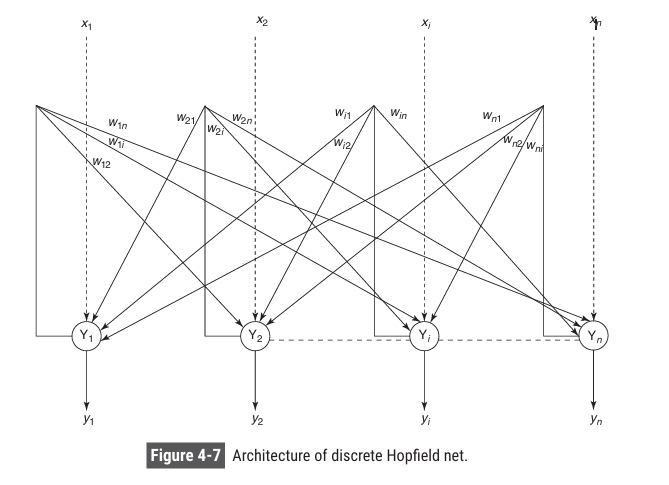


# Hopfield Network Example

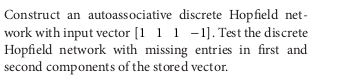

In [ ]:
import numpy as np
import random

class DiscreteHopfieldNet:
    def __init__(self, patterns):
        self.patterns = patterns
        self.n = patterns[0].size
        self.W = np.zeros((self.n, self.n))

        # Hebbian learning (autoassociative)
        for p in patterns:
            self.W += np.outer(p, p)

        np.fill_diagonal(self.W, 0)  # No self-connections

    def recall(self, input_pattern, max_iter=100):
        state = input_pattern.copy()

        # Replace missing entries (0) with random ±1
        for i in range(len(state)):
            if state[i] == 0:
                state[i] = random.choice([-1, 1])

        print("Initial state (with guesses for missing values):")
        print(state)

        for iteration in range(max_iter):
            prev_state = state.copy()
            indices = list(range(len(state)))
            random.shuffle(indices)

            for i in indices:
                net_input = np.dot(self.W[i], state)
                if net_input > 0:
                    state[i] = 1
                elif net_input < 0:
                    state[i] = -1
                # else, keep previous value (no change)

            print(f"Iteration {iteration + 1}: {state}")

            if np.array_equal(state, prev_state):
                print("Converged.")
                break
        else:
            print("Did not converge in given iterations.")

        return state

# Define stored pattern
stored_pattern = np.array([1, 1, 1, -1])

# Create Hopfield network
hopfield_net = DiscreteHopfieldNet([stored_pattern])

# Define test input with missing entries in first and second components
test_input = np.array([0, 0, 1, -1])  # 0s are missing values

# Recall from partial input
print("Recalling from partial input:")
output = hopfield_net.recall(test_input)

print("\nFinal recalled pattern:")
print(output)


Recalling from partial input:
Initial state (with guesses for missing values):
[ 1  1  1 -1]
Iteration 1: [ 1  1  1 -1]
Converged.

Final recalled pattern:
[ 1  1  1 -1]


# Real-Life example of BAM
A Bidirectional Associative Memory (BAM) model was trained using images of the digits 3 and 8.
These images were preprocessed (for example, converted to grayscale and normalized to a fixed resolution), and their pixel values were used as input patterns for the BAM network.

During training, the BAM learns to associate each input pattern (say, an image of “3”) with its corresponding output pattern (for instance, a labeled or complementary version of “3”), and similarly for “8.” Once trained, the network can recall the associated output when presented with a noisy or incomplete version of either “3” or “8.”


--- Recall from an input image (should be '3') ---
Initial activation (side=X):
X: [-1 -1 -1  1  1 -1 -1 -1 -1 -1  1 -1  1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1
 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1
 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1  1  1  1 -1 -1]
Y: [0.]
----
Iteration 1:
X: [-1 -1  1  1  1  1 -1 -1 -1  1  1 -1  1 -1  1 -1 -1 -1 -1 -1  1 -1 -1 -1
 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1  1  1 -1
 -1 -1 -1 -1 -1  1  1 -1 -1 -1  1  1  1  1 -1 -1]
Y: [-1]
----
Iteration 2:
X: [-1 -1  1  1  1  1 -1 -1 -1  1  1 -1  1 -1  1 -1 -1 -1 -1 -1  1 -1 -1 -1
 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1  1  1 -1
 -1 -1 -1 -1 -1  1  1 -1 -1 -1  1  1  1  1 -1 -1]
Y: [-1]
----
Converged at iteration 2
Predicted label: 3

--- Recall from a label (should reconstruct digit '8') ---
Initial activation (side=Y):
X: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

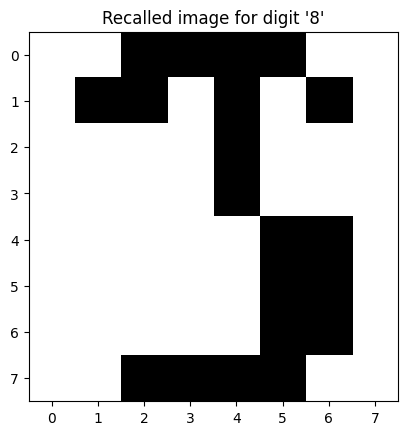

In [ ]:
from sklearn.datasets import load_digits
from sklearn.preprocessing import LabelBinarizer
import numpy as np

# Load digits dataset (images of 0–9, 8x8)
digits = load_digits()

X_raw = digits.data  # shape (1797, 64)
y_raw = digits.target  # shape (1797,)

# Only use a few digits to reduce complexity (e.g., '3' and '8')
mask = (y_raw == 3) | (y_raw == 8)
X_raw = X_raw[mask]
y_raw = y_raw[mask]

# Binarize image pixels: threshold at half max (16 in digits dataset)
X_bipolar = np.where(X_raw > 8, 1, -1)  # now bipolar (shape: Nx64)

# Encode labels (3 and 8) to bipolar output vectors
lb = LabelBinarizer()
y_onehot = lb.fit_transform(y_raw)  # shape: (N, 2), e.g. [1,0] or [0,1]
y_bipolar = np.where(y_onehot == 1, 1, -1)  # convert to bipolar

# Create and train BAM
bam_net = BAM(input_vectors=list(X_bipolar), output_vectors=list(y_bipolar))

# Test with a 3
print("\n--- Recall from an input image (should be '3') ---")
x_test = X_bipolar[0]
x_rec, y_rec = bam_net.recall(x_test)

# Decode output
label_pred = lb.inverse_transform(np.array([(y_rec + 1) // 2]))[0]

print("Predicted label:", label_pred)

# Test with a label input (e.g., for '8')
print("\n--- Recall from a label (should reconstruct digit '8') ---")
y_input = y_bipolar[y_raw == 8][0]
x_rec2, y_rec2 = bam_net.recall(y_input, side='Y')

# Optional: Reshape and view image
import matplotlib.pyplot as plt
plt.imshow(((x_rec2 + 1) // 2).reshape(8, 8), cmap='gray')  # convert to 0-1
plt.title("Recalled image for digit '8'")
plt.show()


# Real-life example of Hopfield Network
A Hopfield Network was trained using images of the digits 0, 3, and 8.
Each image was first converted into a bipolar pattern representing pixel intensities. These patterns were then stored in the Hopfield network’s weight matrix using Hebbian learning, allowing the network to memorize these images as stable states (attractors).

During recall, when a noisy or incomplete image of any of these digits is presented, the network iteratively updates the neuron states until it converges to the closest stored pattern — effectively reconstructing the original digit (0, 3, or 8).

Initial state (with guesses for missing values):
[-1 -1  1  1  1  1 -1 -1 -1 -1  1 -1  1  1 -1 -1 -1 -1 -1 -1  1  1 -1 -1
 -1 -1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1
  1 -1  1 -1  1  1 -1 -1  1 -1  1  1 -1 -1 -1 -1]
Iteration 1: [-1 -1 -1  1  1 -1 -1 -1 -1 -1  1  1  1  1 -1 -1 -1 -1  1  1 -1  1 -1 -1
 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1  1 -1 -1  1 -1 -1
 -1 -1  1 -1 -1  1 -1 -1 -1 -1 -1  1  1  1 -1 -1]
Iteration 2: [-1 -1 -1  1  1 -1 -1 -1 -1 -1  1  1  1  1 -1 -1 -1 -1  1  1 -1  1 -1 -1
 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1  1 -1 -1  1 -1 -1
 -1 -1  1 -1 -1  1 -1 -1 -1 -1 -1  1  1  1 -1 -1]
Converged.


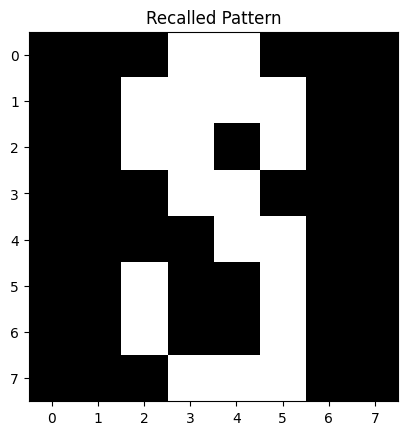

In [ ]:
import numpy as np
import random
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt


# Step 1: Load dataset
digits = load_digits()
X = digits.data  # shape: (1797, 64)
y = digits.target

# Step 2: Select some digit patterns to store (e.g., 0, 3, 8)
selected_digits = [0, 3, 8]
stored_patterns = []

for digit in selected_digits:
    idx = np.where(y == digit)[0][0]  # first occurrence
    img = X[idx]
    # Binarize and convert to bipolar
    bin_img = np.where(img > 8, 1, -1)
    stored_patterns.append(bin_img)

# Step 3: Create Hopfield network
hop_net = DiscreteHopfieldNet(stored_patterns)

# Step 4: Corrupt a pattern (e.g., digit "3")
test_idx = np.where(y == 3)[0][1]  # second "3"
test_img = X[test_idx]
test_bipolar = np.where(test_img > 8, 1, -1)

# Introduce corruption (set 20% of values to 0)
corrupted = test_bipolar.copy()
zero_indices = np.random.choice(len(corrupted), size=13, replace=False)
corrupted[zero_indices] = 0

# Step 5: Recall the pattern
recalled = hop_net.recall(corrupted)

# Step 6: Show final recalled image
plt.imshow(((recalled + 1) // 2).reshape(8, 8), cmap='gray')
plt.title("Recalled Pattern")
plt.show()
